In [3]:
import glob
import sys
import numpy as np
import pandas as pd
import pickle as pk
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
import pandas as pd

# Genearal analisys

In [4]:
# loadiing entire data-set

### Background

b_name='/home/thiago/Documents/Data_Sets/LPC-anomaly-detection/Input_Background_1.csv'
background = np.genfromtxt(b_name, delimiter=',')
background = background[1:,:]
print(".Background Loaded..." )
print(".Background shape: {}".format(background.shape))

### Signal

s_name='/home/thiago/Documents/Data_Sets/LPC-anomaly-detection/Input_Signal_1.csv'
signal = np.genfromtxt(s_name, delimiter=',')
signal = signal[1:,:]
print(".Signal Loaded...")
print(".Signal shape: {}\n".format(signal.shape))


.Background Loaded...
.Background shape: (543500, 21)
.Signal Loaded...
.Signal shape: (522467, 21)



In [6]:
attributes = ["px1","py1","pz1","E1","eta1",
                "phi1","pt1","px2","py2","pz2",
                "E2","eta2","phi2","pt2",
                "Delta_R","M12","MET","S","C",
                "HT","A"]


In [ ]:

bg_eval_list = []

sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Probaility Distribution Function of the original attributes using entire data-set', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=100)

        sg_eval = np.linspace(sg_min,sg_max,num=100)


        # appending values interval the following analysis

        bg_eval_list.append(bg_eval)

        sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_xlabel(att)
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

#plt.savefig('figures/original-attributes-PDF-entire-data-set.pdf',format='pdf')

del fig

## Z-score for using geral mean

In [11]:
# Find the min and max values for each column
def dataset_minmax(dataset):

    value_min = min(dataset)
    value_max = max(dataset)
    minmax = [value_min, value_max]

    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    
    for i in range(len(dataset)):
        dataset[i] = (dataset[i] - minmax[0]) / (minmax[1] - minmax[0])


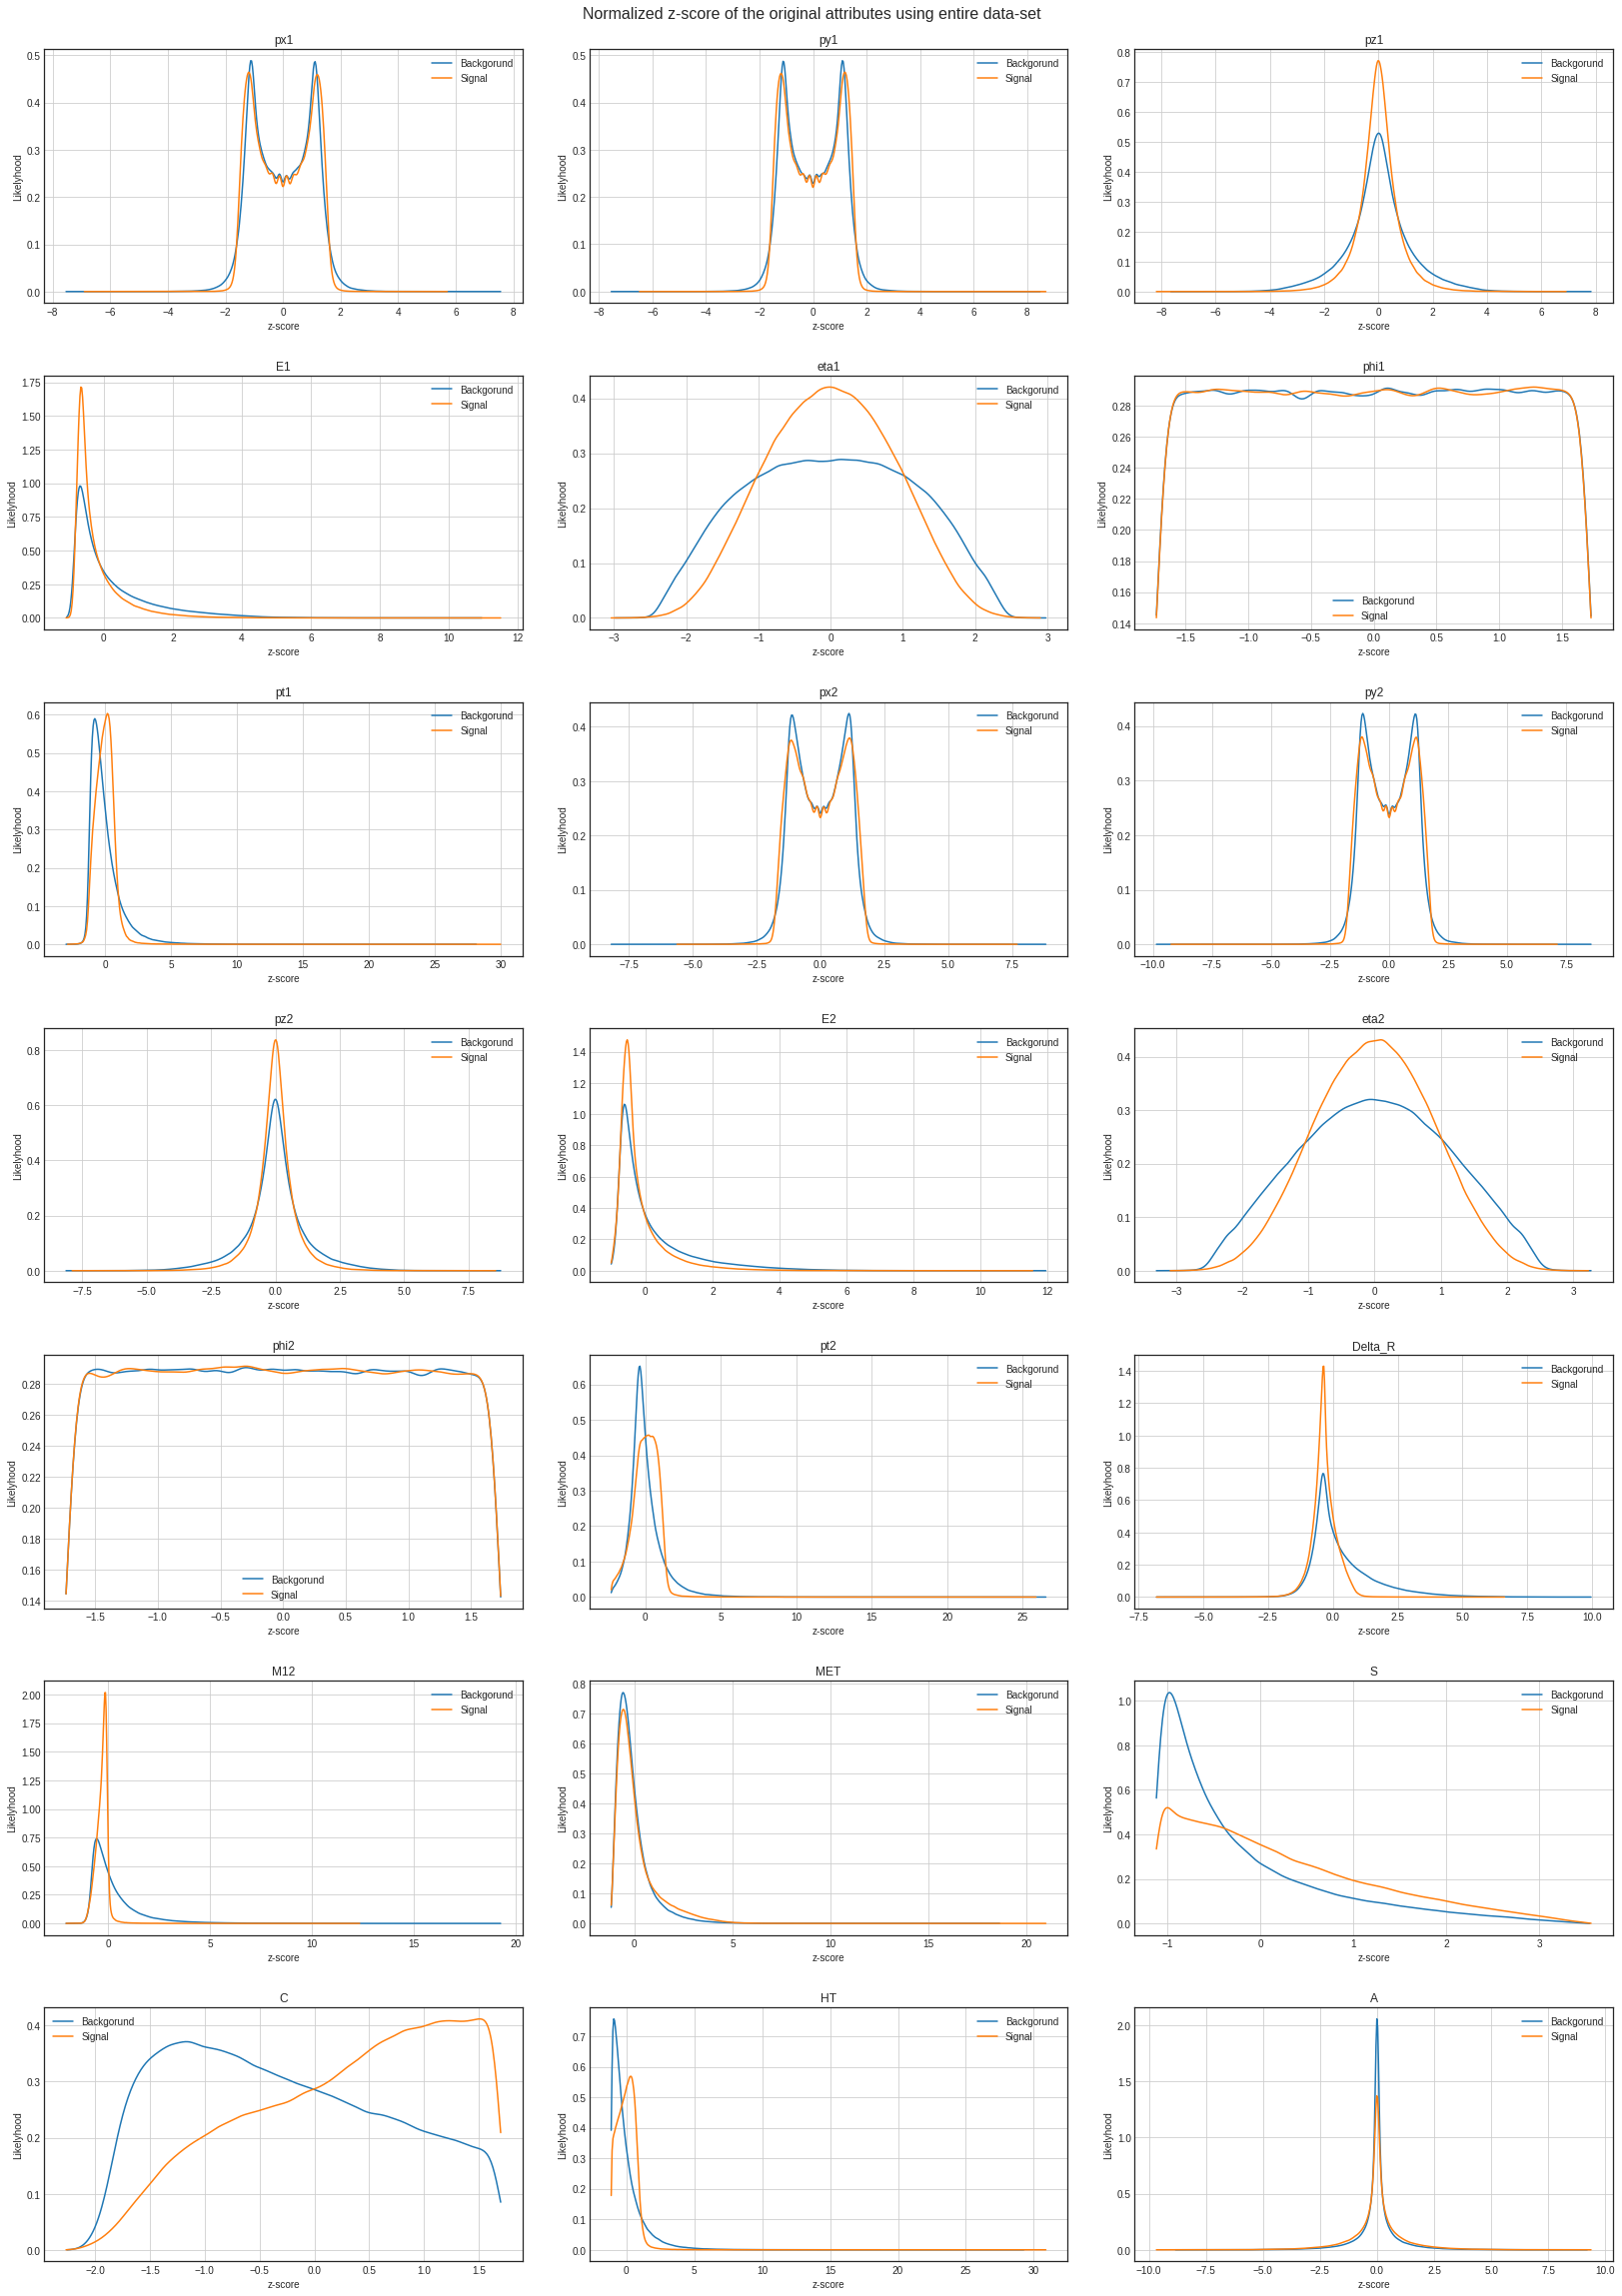

In [128]:
z_bg_eval_list = []

z_sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Normalized z-score of the original attributes using entire data-set', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # unite background and signal for z-score
        # calculation

        all_data = np.hstack((att_background,att_signal))

        mean = np.mean(all_data)

        std = np.std(all_data)

        # calculation zscore

        bg_zscore = (att_background - mean)/std
        
        sg_zscore = (att_signal - mean)/std

        # normalizing

        # Calculate min and max for each column

        #bg_minmax = dataset_minmax(bg_zscore)

        #sg_minmax = dataset_minmax(sg_zscore)

        # Normalize columns

        #normalize_dataset(bg_zscore, bg_minmax)

        #normalize_dataset(sg_zscore, bg_minmax)

        # computing the zscore distribution

        bg_kernel = stats.gaussian_kde(bg_zscore)

        sg_kernel = stats.gaussian_kde(sg_zscore)

        # defining attributes limits

        bg_max = max(bg_zscore)

        bg_min = min(bg_zscore)

        sg_max = max(sg_zscore)

        sg_min = min(sg_zscore)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # appending values interval the following analysis

        z_bg_eval_list.append(bg_eval)

        z_sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title(att)
        ax[line,col].set_xlabel("z-score")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

#plt.savefig('figures/original-attributes-z-score-entire-data-set.pdf',format='pdf')

del fig

## Z-score for using background mean

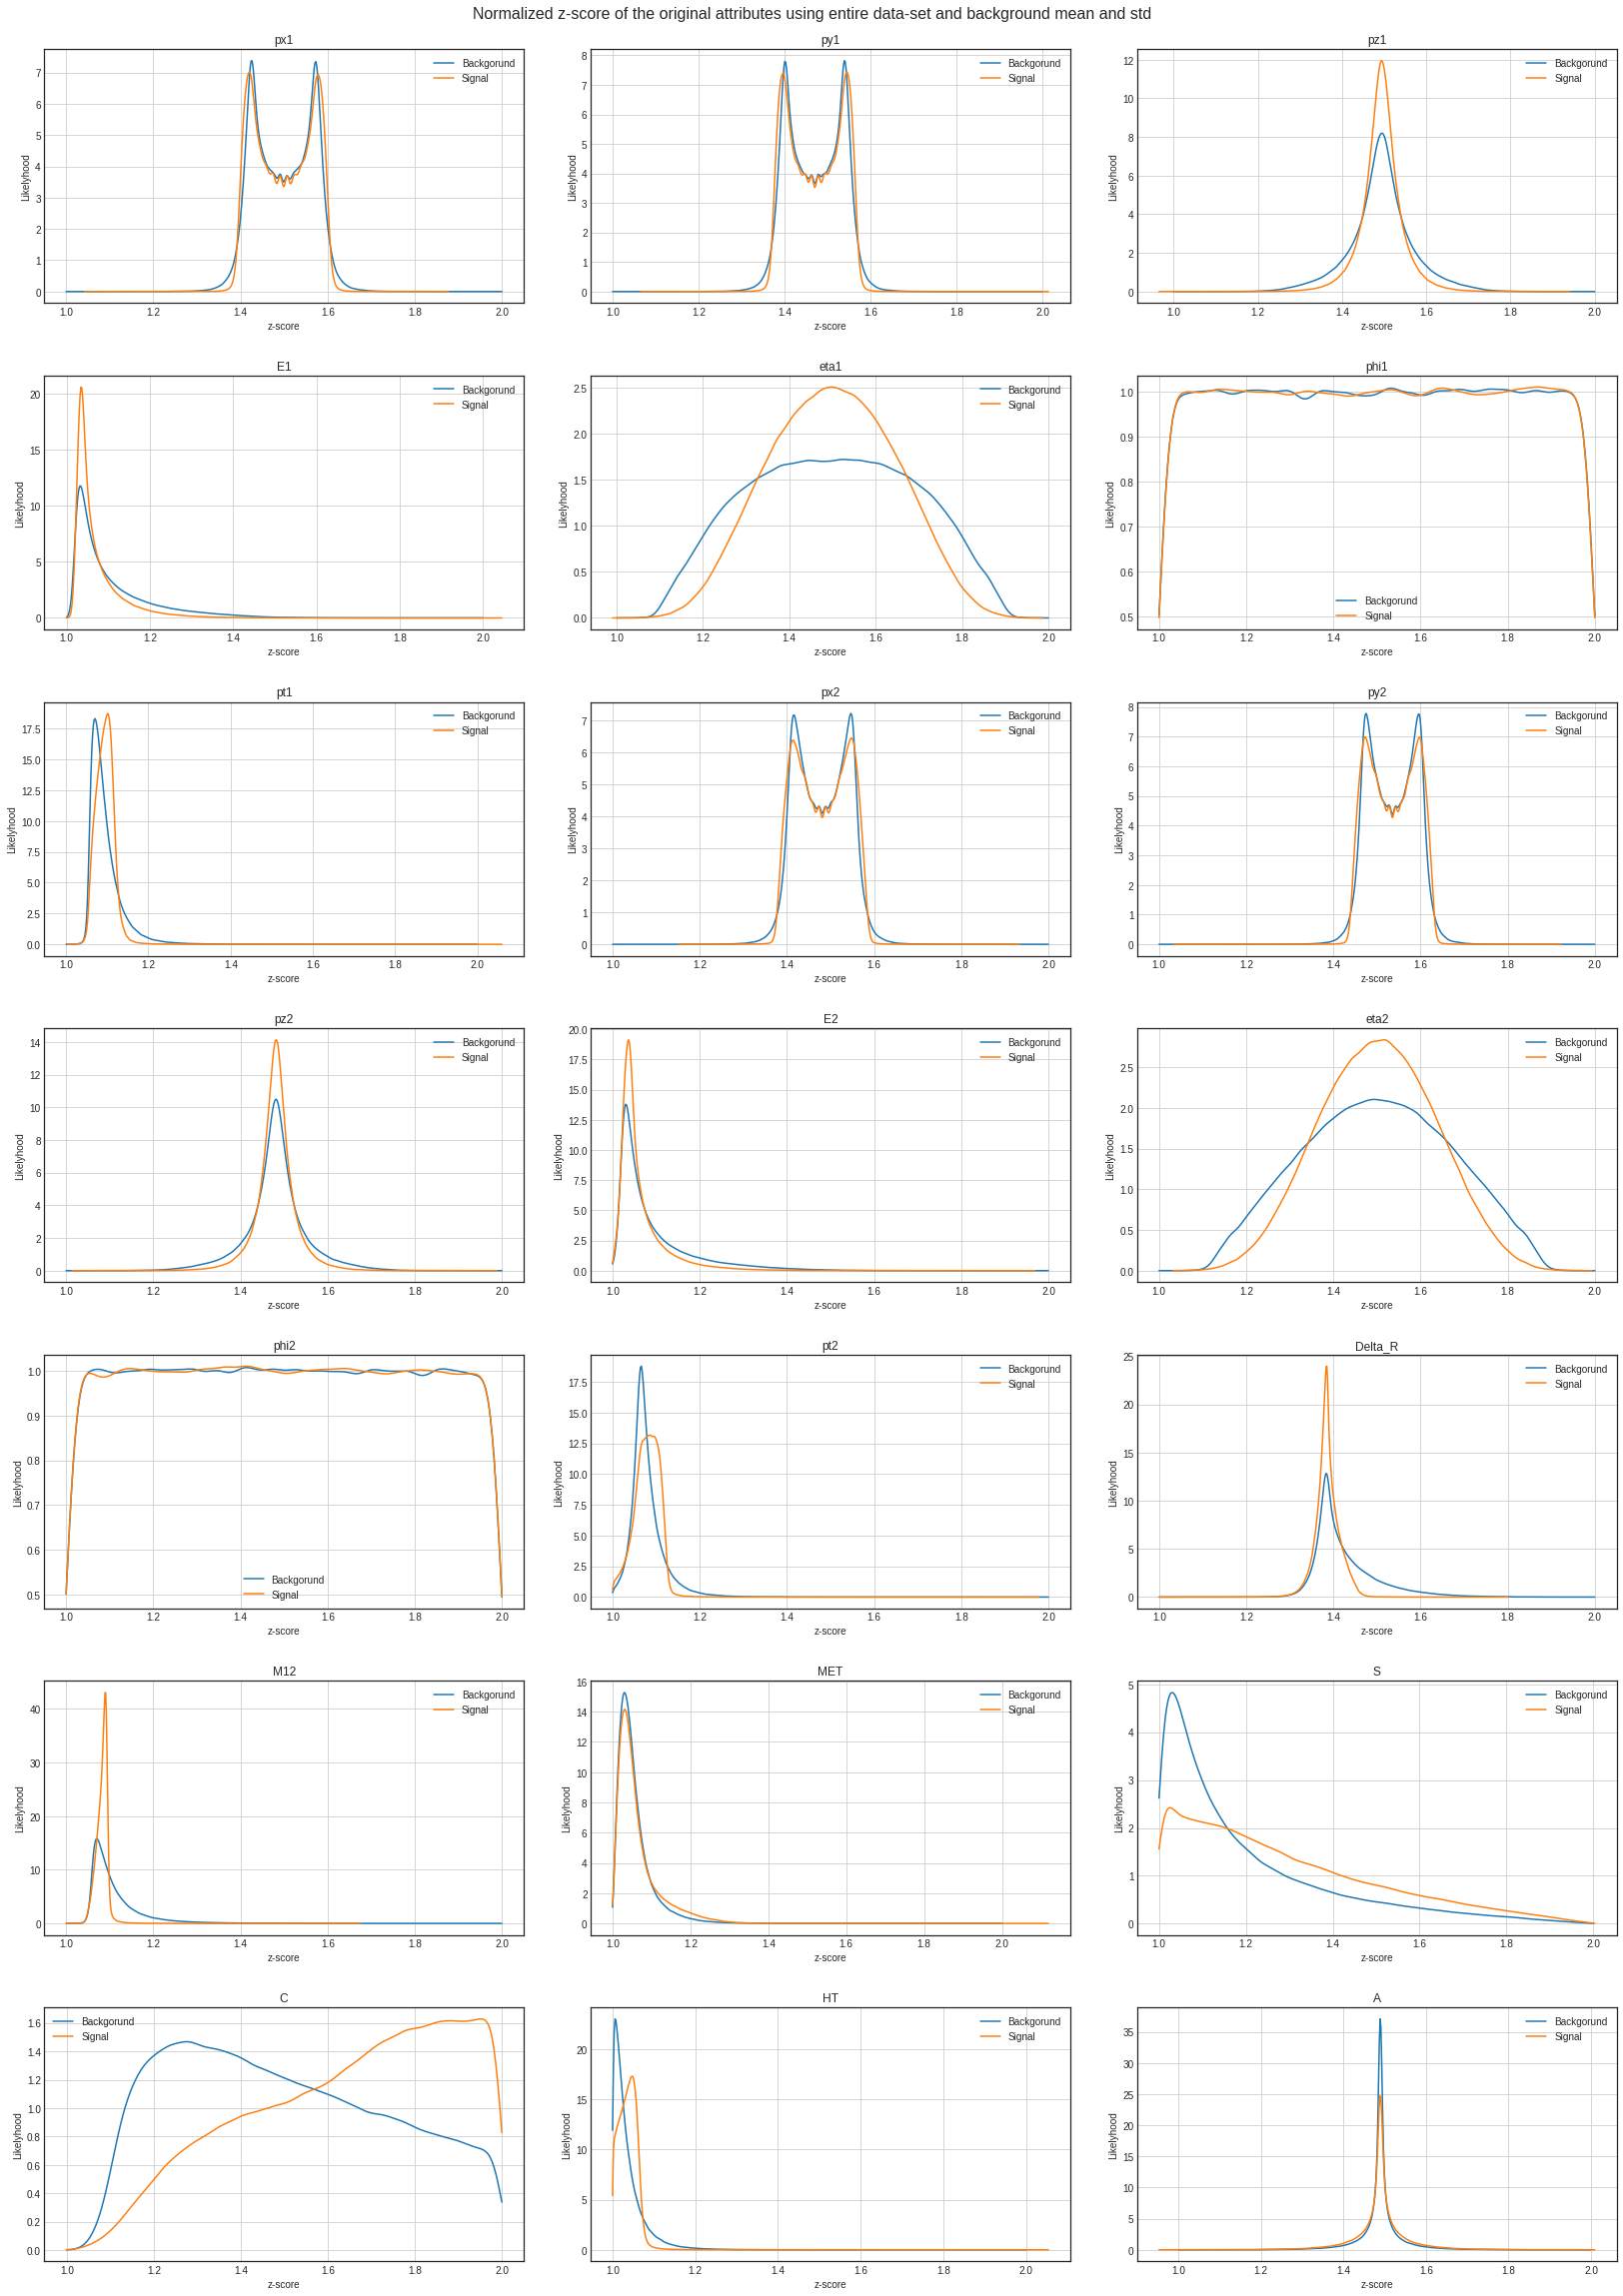

In [129]:
z_bg_eval_list = []

z_sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Normalized z-score of the original attributes using entire data-set and background mean and std', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # getting measures for z-score calculation

        mean = np.mean(att_background)

        std = np.std(att_background)

        # calculation zscore

        bg_zscore = (att_background - mean)/std
        
        sg_zscore = (att_signal - mean)/std

        # normalizing

        # Calculate min and max for each column

        bg_minmax = dataset_minmax(bg_zscore)

        sg_minmax = dataset_minmax(sg_zscore)

        # Normalize columns

        normalize_dataset(bg_zscore, bg_minmax)

        normalize_dataset(sg_zscore, bg_minmax)

        # computing the zscore distribution

        bg_kernel = stats.gaussian_kde(bg_zscore)

        sg_kernel = stats.gaussian_kde(sg_zscore)

        # defining attributes limits

        bg_max = max(bg_zscore)

        bg_min = min(bg_zscore)

        sg_max = max(sg_zscore)

        sg_min = min(sg_zscore)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # appending values interval the following analysis

        z_bg_eval_list.append(bg_eval)

        z_sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title(att)
        ax[line,col].set_xlabel("z-score")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

#plt.savefig('figures/original-attributes-z-score-from-bg-entire-data-set.pdf',format='pdf')

del fig

## z-score used as weight:
## $z-score \times data$

KeyboardInterrupt: 

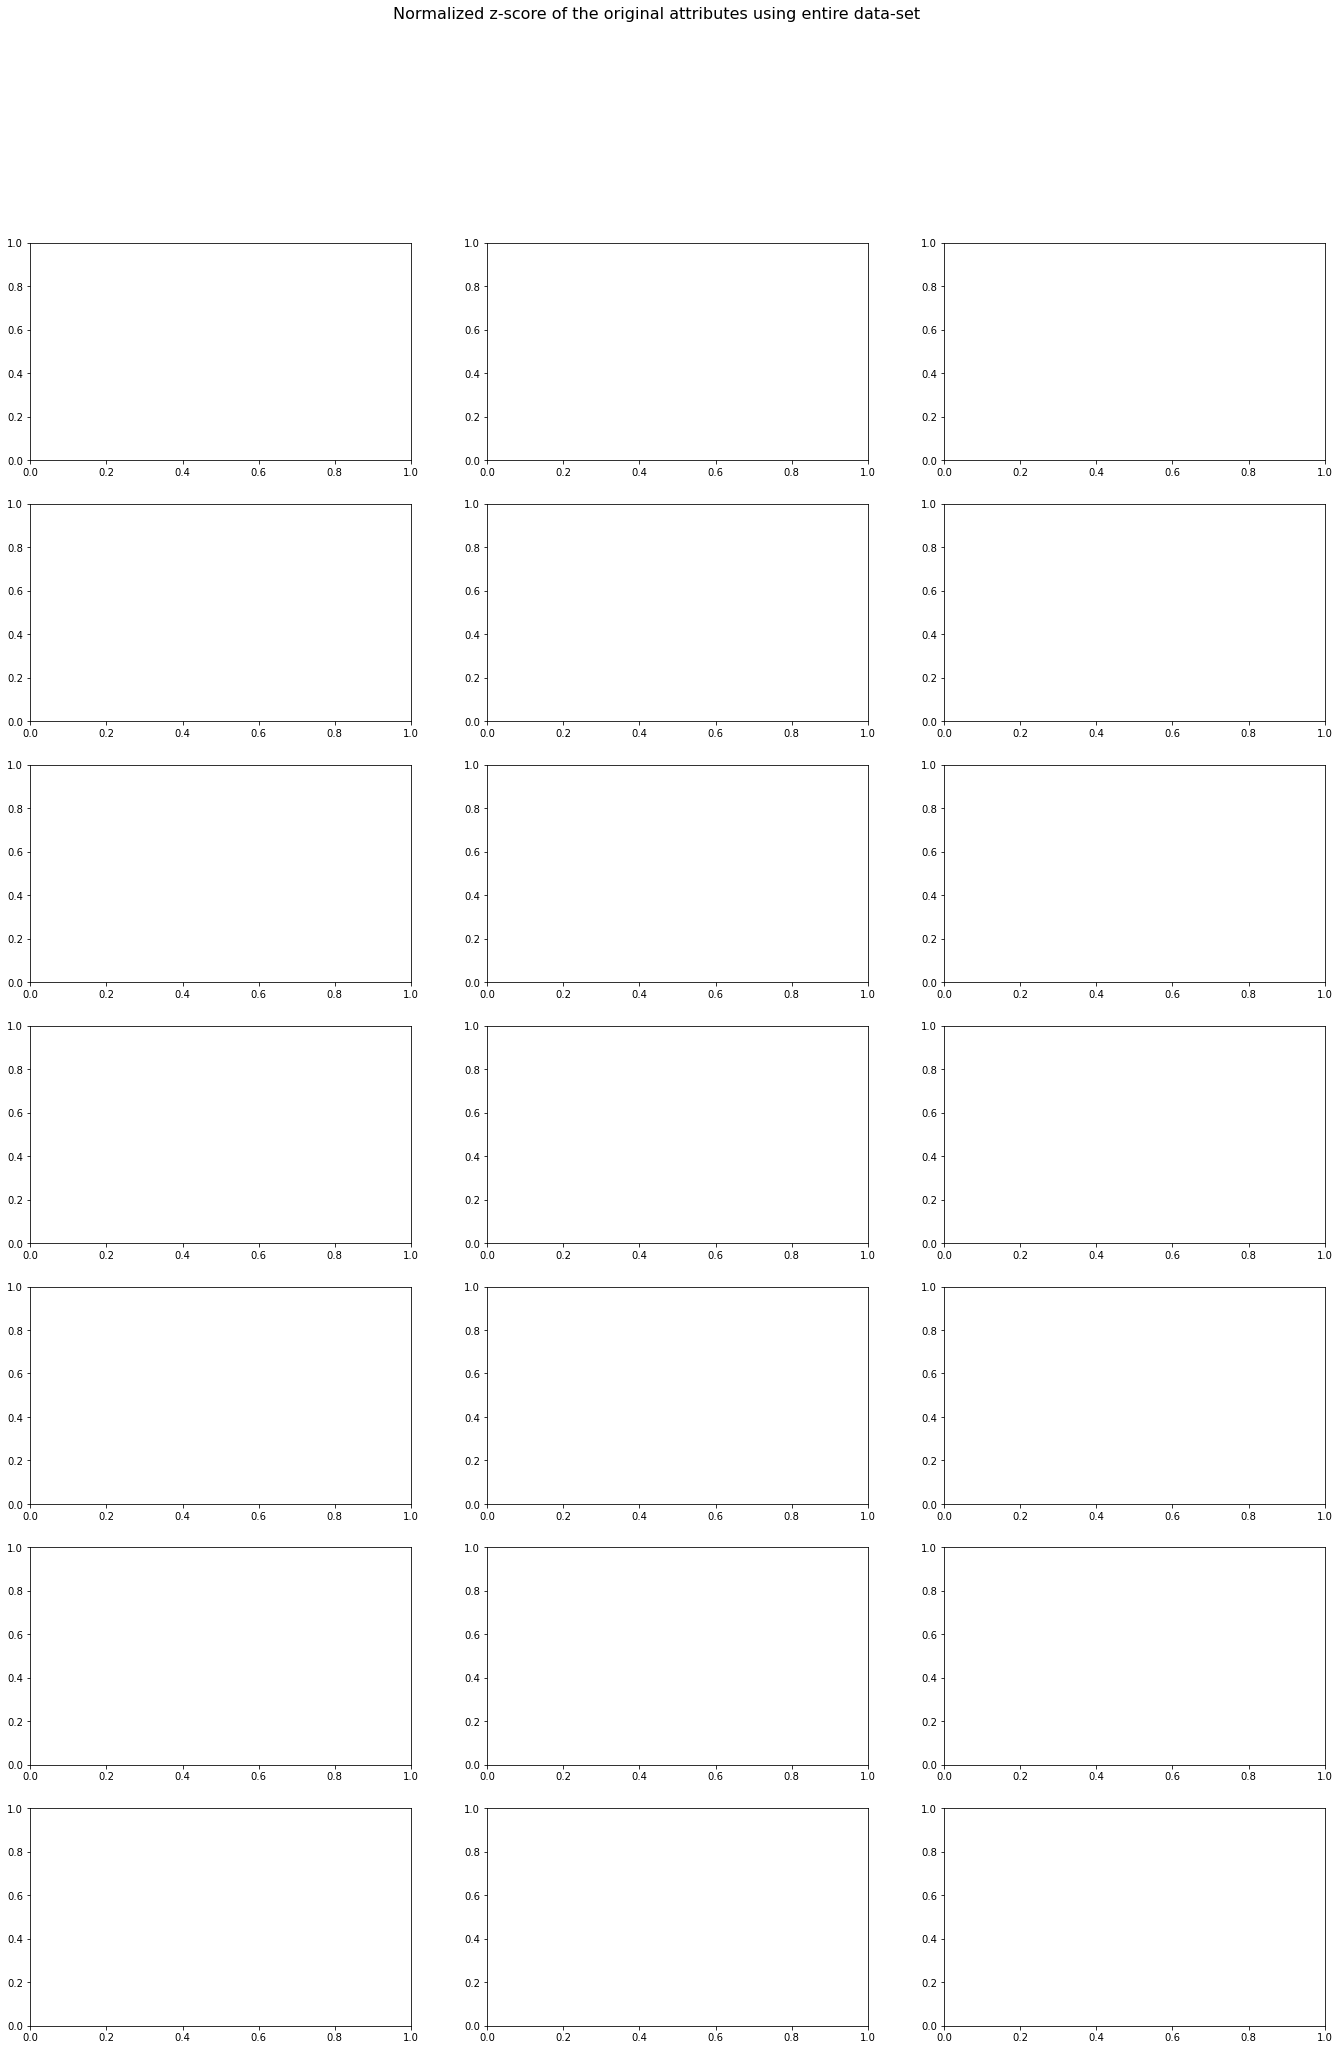

In [7]:
z_bg_eval_list = []

z_sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Normalized z-score of the original attributes using entire data-set', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # unite background and signal for z-score
        # calculation

        all_data = np.hstack((att_background,att_signal))

        mean = np.mean(all_data)

        std = np.std(all_data)

        # calculation zscore

        bg_zscore = (att_background - mean)/std
        
        sg_zscore = (att_signal - mean)/std

        # using zscore as weight

        att_background = att_background * bg_zscore

        att_signal = att_signal * sg_zscore

        # computing the zscore distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=500)

        sg_eval = np.linspace(sg_min,sg_max,num=500)


        # appending values interval the following analysis

        z_bg_eval_list.append(bg_eval)

        z_sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title(att)
        ax[line,col].set_xlabel("z-score")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-z-score-weight-entire-data-set.pdf',format='pdf')

del fig

## Distance/Dissimilarity components

In [9]:
import math as m

def pi_calculator(Uniquesample, mode):
    '''
    # Cumulative Proximity in recursive version
    # Section 2.2.i of SODA
    '''
    UN, W = Uniquesample.shape
    if mode == 'euclidean':
        AA1 = Uniquesample.mean(0)
        X1 = sum(sum(np.power(Uniquesample,2)))/UN
        DT1 = X1 - sum(np.power(AA1,2))
        aux = []
        for i in range(UN): aux.append(AA1)
        aux2 = [Uniquesample[i]-aux[i] for i in range(UN)]
        uspi = np.sum(np.power(aux2,2),axis=1)+DT1

    if mode == 'cosine':
        Xnorm = np.matrix(np.sqrt(np.sum(np.power(Uniquesample,2),axis=1))).T
        aux2 = Xnorm
        for i in range(W-1):
            aux2 = np.insert(aux2,0,Xnorm.T,axis=1)
        Uniquesample1 = Uniquesample / aux2
        AA2 = np.mean(Uniquesample1,0)
        X2 = 1
        DT2 = X2 - np.sum(np.power(AA2,2))
        aux = []
        for i in range(UN): aux.append(AA2)
        aux2 = [Uniquesample1[i]-aux[i] for i in range(UN)]
        uspi = np.sum(np.sum(np.power(aux2,2),axis=1),axis=1)+DT2
        
    return uspi


def Globaldensity_Calculator(Uniquesample, distancetype):
    '''
    # Return:
    # GD - Global Density
    #      Sum of both Global Density components (Euclidian and Cosine)
    # Density_1 - Euclidean Density
    # Density_2 - Cosine Density
    # Uniquesample - Samples sorted by Global Density
    '''
    uspi1 = pi_calculator(Uniquesample, distancetype)
    
    sum_uspi1 = sum(uspi1)
    Density_1 = uspi1 / sum_uspi1

    uspi2 = pi_calculator(Uniquesample, 'cosine')

    sum_uspi2 = sum(uspi2)
    Density_2 = uspi2 / sum_uspi2

    GD = (Density_2+Density_1)
    index = GD.argsort()[::-1]
    GD = GD[index]
    Uniquesample = Uniquesample[index]


    return GD, Density_1, Density_2, Uniquesample

def Globaldensity_Calculator_v2(data,lbd,att,distancetype):
    '''
    # Return:
    # GD - Global Density
    #      Sum of both Global Density components (Euclidian and Cosine)
    # Density_1 - Euclidean Density
    # Density_2 - Cosine Density
    # Uniquesample - Samples sorted by Global Density
    '''

    # getting measures for z-score calculation

    mean = np.mean(data[:,att])

    std = np.std(data[:,att])

    # calculation zscore

    zscore = (data[:,att] - mean)/std

    # normalizing

    # Calculate min and max for each column

    minmax = dataset_minmax(zscore)

    # Normalize columns

    normalize_dataset(zscore, minmax)

    # calculing EDA and densities

    dist1 = pi_calculator(data, distancetype)

    uspi1 = dist1*lbd*zscore
    
    sum_uspi1 = sum(uspi1)
    Density_1 = uspi1 / (sum_uspi1)
    
    dist2 = pi_calculator(data, 'cosine')

    uspi2 = dist2*lbd*zscore

    sum_uspi2 = sum(uspi2)
    Density_2 = uspi2 / (sum_uspi2)

    GD = (Density_2+Density_1)
    index = GD.argsort()[::-1]
    GD = GD[index]
    Uniquesample = data[index]


    return Density_1,Density_2,dist1,dist2


### $d(x_i,x_j) \times z-score$

In [14]:
##### calculing EDA #####

lbd = 1

# concatenating data

data = np.vstack((background,signal))

GD_euclidean,GD_cosine,euclidean,cosine = Globaldensity_Calculator_v2 (data,
                                                                        lbd,
                                                                        0,
                                                                        'euclidean')


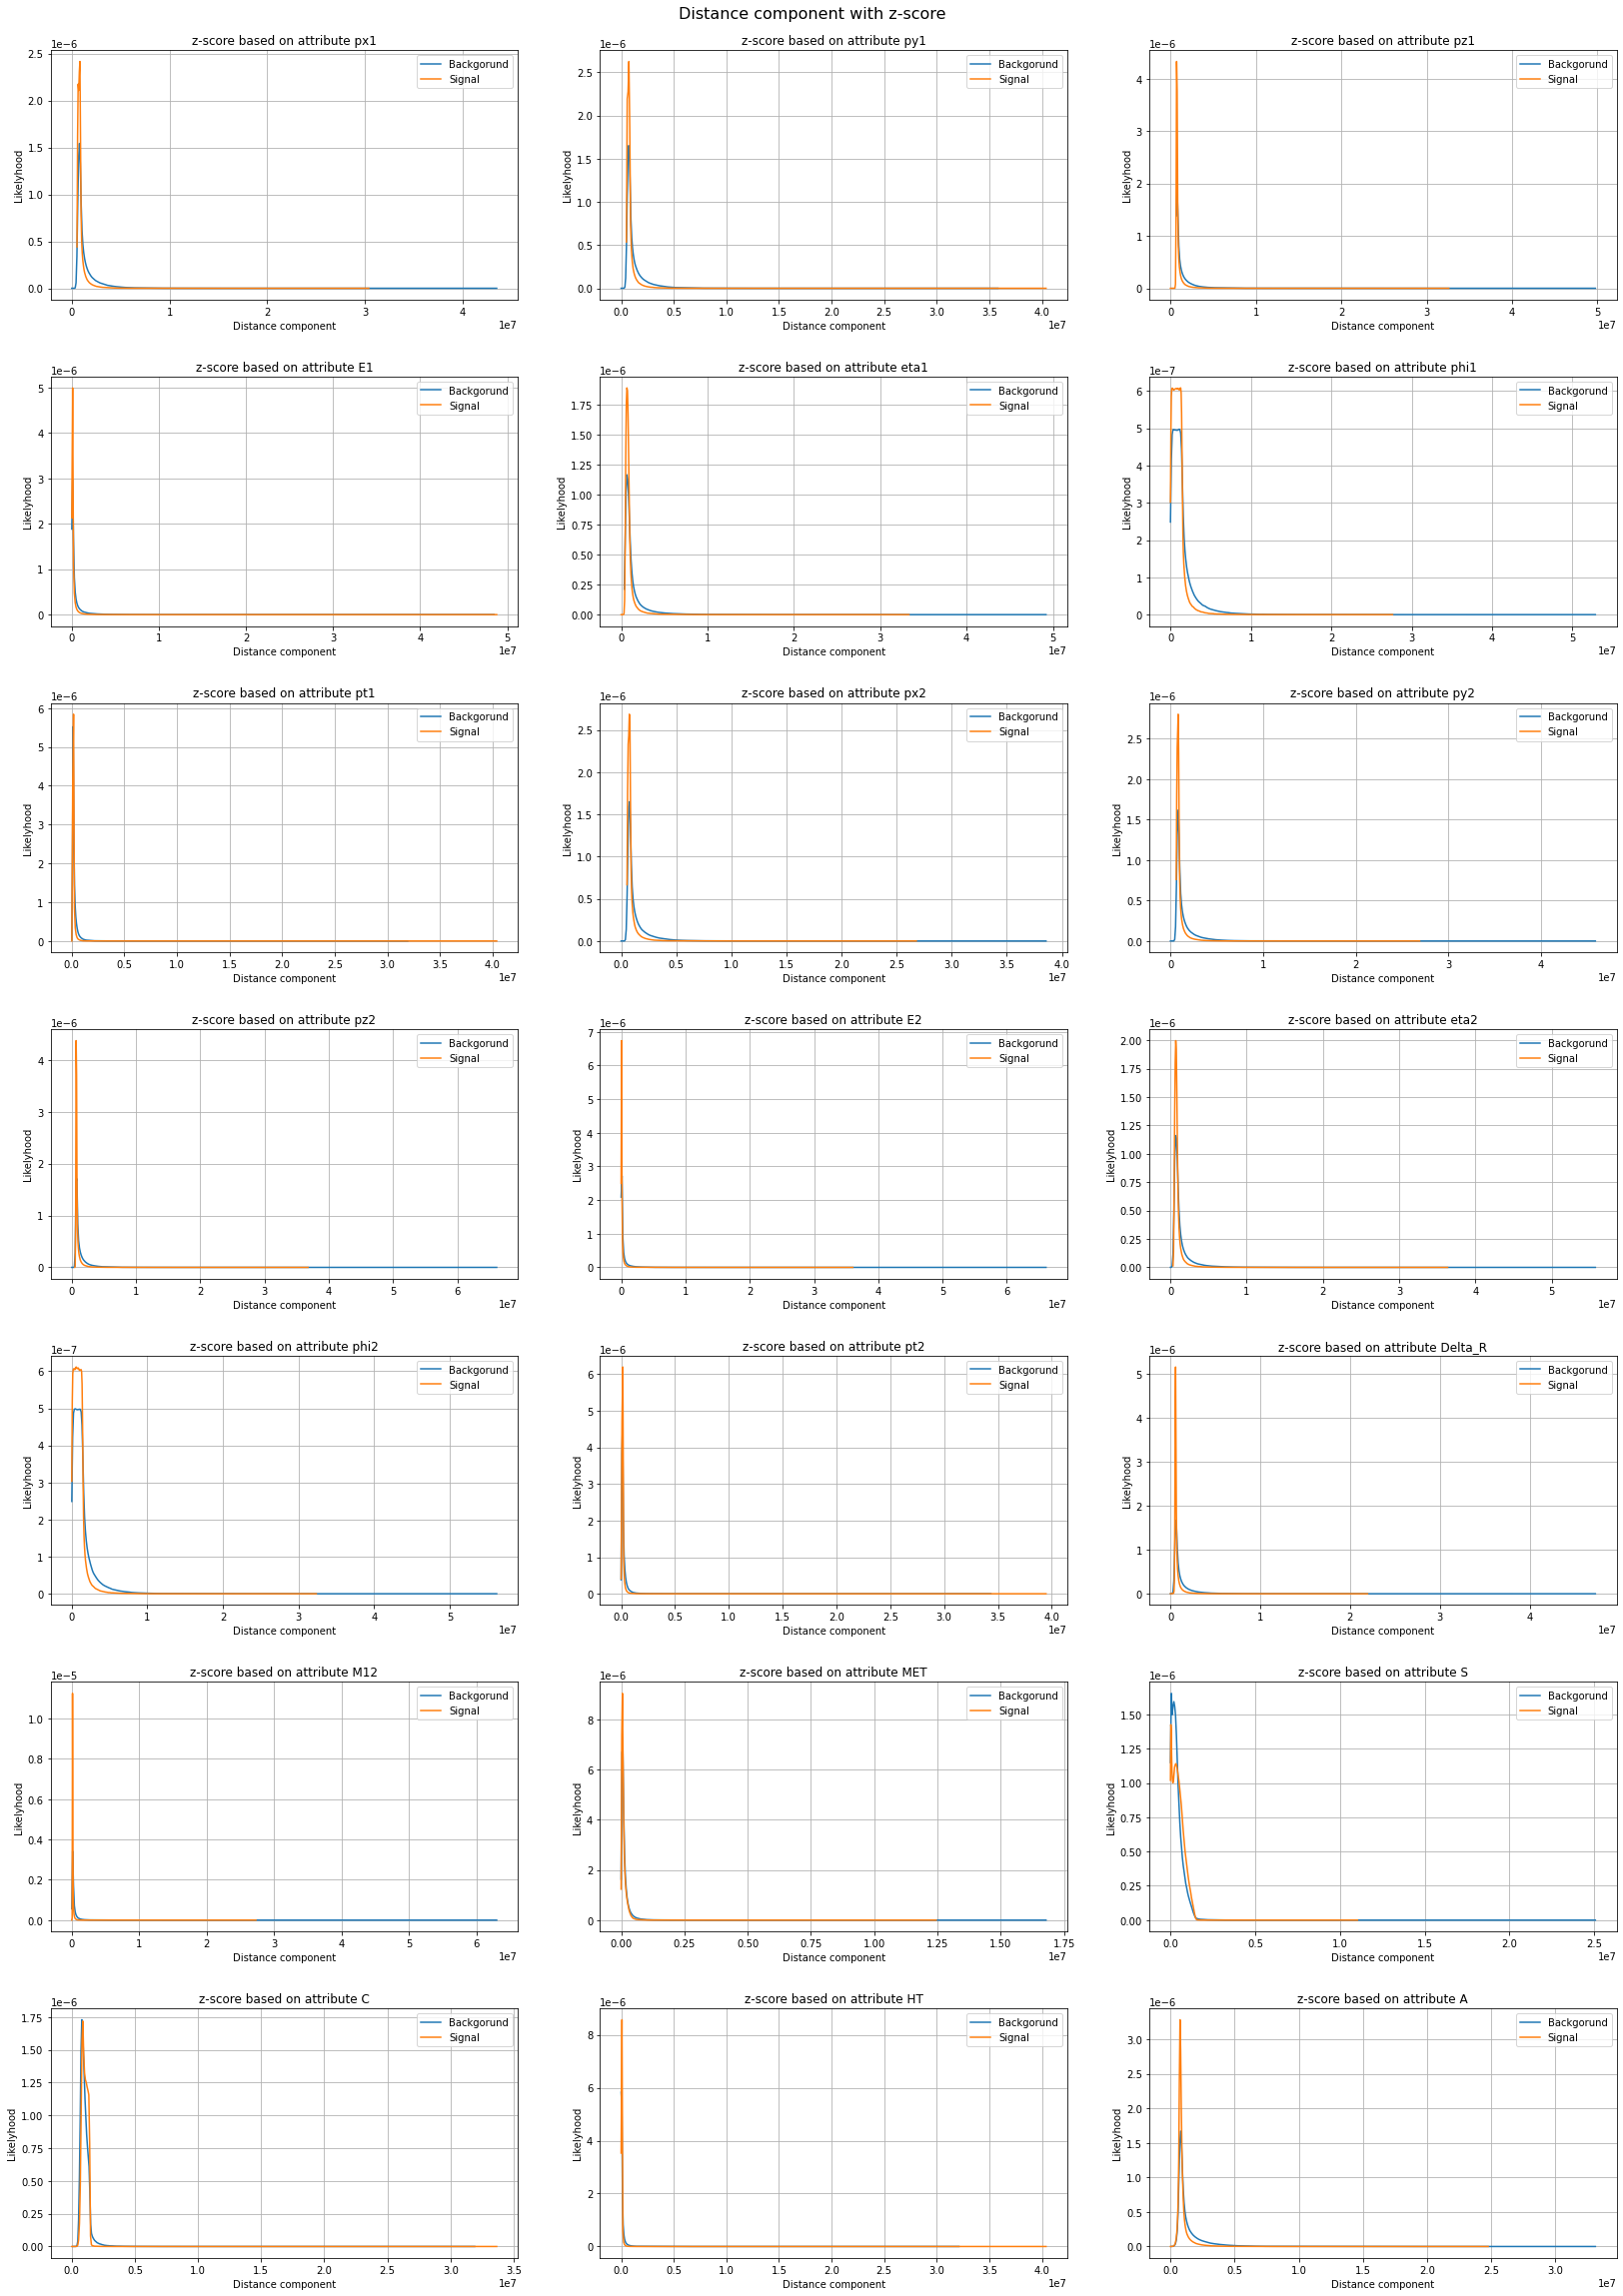

In [15]:
##### Magnitude component #####

# creating labels

target = np.ones(len(data))

target[:len(background)] = 0

# defining plot attrributes

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Distance component with z-score', fontsize=16)


for i,att in enumerate(attributes):

        # getting measures for z-score calculation

        mean = np.mean(data[:,i])

        std = np.std(data[:,i])

        # calculation zscore

        zscore = (data[:,i] - mean)/std


        # normalizing

        # Calculate min and max for each column

        minmax = dataset_minmax(zscore)


        # Normalize columns

        normalize_dataset(zscore, minmax)


        # calculing EDA

        euclidean_EDA = euclidean*lbd*zscore


        # defining plot ranges

        euclidean_max = max(euclidean_EDA)

        euclidean_min = min(euclidean_EDA)


        # separeting results

        bg_euclidean_EDA = euclidean_EDA[target==0]

        sg_euclidean_EDA = euclidean_EDA[target==1]


        # computing the EDA distribution

        bg_euclidean_kernel = stats.gaussian_kde(bg_euclidean_EDA)

        sg_euclidean_kernel = stats.gaussian_kde(sg_euclidean_EDA)


        # defining attributes limits

        bg_euclidean_max = max(bg_euclidean_EDA)

        bg_euclidean_min = min(bg_euclidean_EDA)

        sg_euclidean_max = max(sg_euclidean_EDA)

        sg_euclidean_min = min(sg_euclidean_EDA)


        # creating values interval for time optimization

        bg_euclidean_eval = np.linspace(bg_euclidean_min,
                                        bg_euclidean_max,
                                        num=500)

        sg_euclidean_eval = np.linspace(sg_euclidean_min,
                                        sg_euclidean_max,
                                        num=500)


        # calculating the likelyhood with kde kernel

        bg_euclidean_likelyhood = bg_euclidean_kernel(bg_euclidean_eval)

        sg_euclidean_likelyhood = sg_euclidean_kernel(sg_euclidean_eval)


        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_euclidean_eval, bg_euclidean_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_euclidean_eval, sg_euclidean_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title('z-score based on attribute {}'.format(att))
        ax[line,col].set_xlabel("Distance component")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-distance-component-with-z-score-entire-data-set.pdf',format='pdf')

del fig

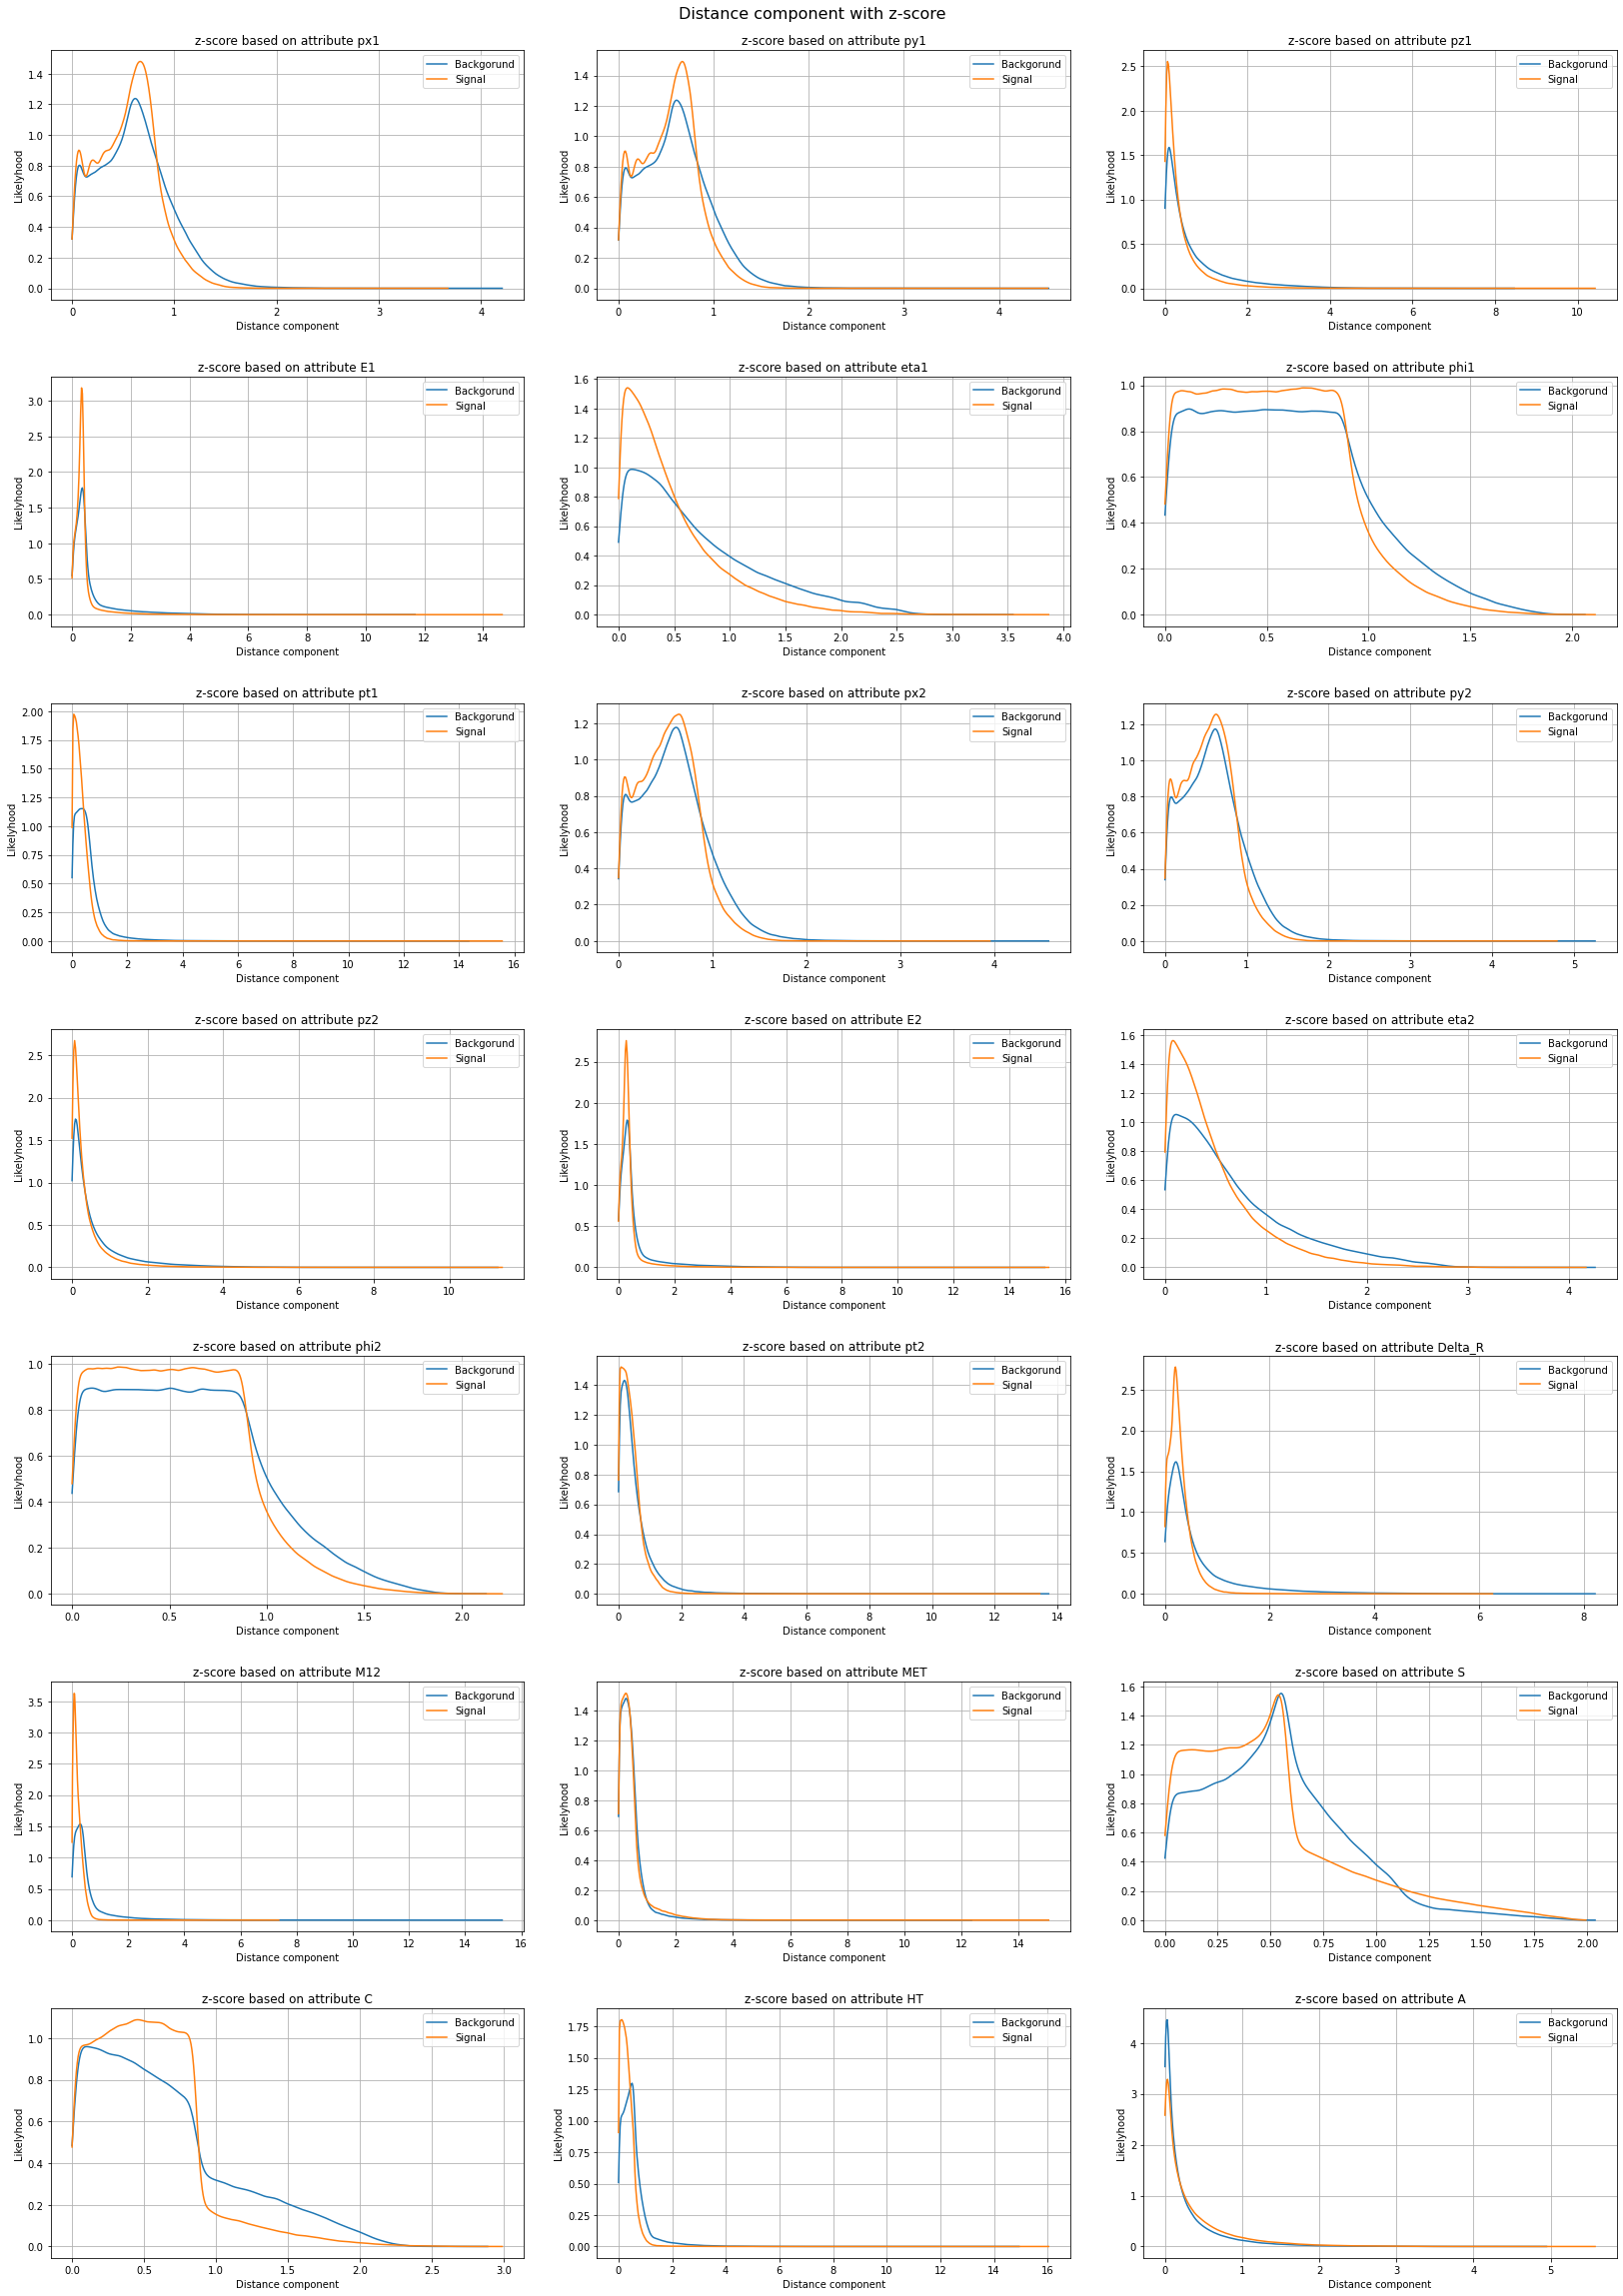

In [16]:
##### Angular component #####

lbd = 1

# concatenating data

data = np.vstack((background,signal))

# creating labels

target = np.ones(len(data))

target[:len(background)] = 0

# defining plot attrributes

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Distance component with z-score', fontsize=16)

for i,att in enumerate(attributes):


        # getting measures for z-score calculation

        mean = np.mean(data[:,i])

        std = np.std(data[:,i])

        # calculation zscore

        zscore = (data[:,i] - mean)/std


        # normalizing

        # Calculate min and max for each column

        #minmax = dataset_minmax(zscore)


        # Normalize columns

        #normalize_dataset(zscore, minmax)


        # calculing EDA

        cosine_EDA = cosine*lbd*(zscore**2)**0.5


        # defining plot ranges

        cosine_max = max(cosine_EDA)

        cosine_min = min(cosine_EDA)


        # separeting results

        bg_cosine_EDA = cosine_EDA[target==0]

        sg_cosine_EDA = cosine_EDA[target==1]


        # computing the EDA distribution

        bg_cosine_kernel = stats.gaussian_kde(bg_cosine_EDA)

        sg_cosine_kernel = stats.gaussian_kde(sg_cosine_EDA)


        # defining attributes limits

        bg_cosine_max = max(bg_cosine_EDA)

        bg_cosine_min = min(bg_cosine_EDA)

        sg_cosine_max = max(sg_cosine_EDA)

        sg_cosine_min = min(sg_cosine_EDA)


        # creating values interval for time optimization

        bg_cosine_eval = np.linspace(bg_cosine_min,
                                        bg_cosine_max,
                                        num=500)

        sg_cosine_eval = np.linspace(sg_cosine_min,
                                        sg_cosine_max,
                                        num=500)


        # calculating the likelyhood with kde kernel

        bg_cosine_likelyhood = bg_cosine_kernel(bg_cosine_eval)

        sg_cosine_likelyhood = sg_cosine_kernel(sg_cosine_eval)


        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_cosine_eval, bg_cosine_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_cosine_eval, sg_cosine_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title('z-score based on attribute {}'.format(att))
        ax[line,col].set_xlabel("Distance component")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-angular-component-with-z-score-entire-data-set.pdf',format='pdf')

del fig

(10000, 2)


/home/thiago/yes/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


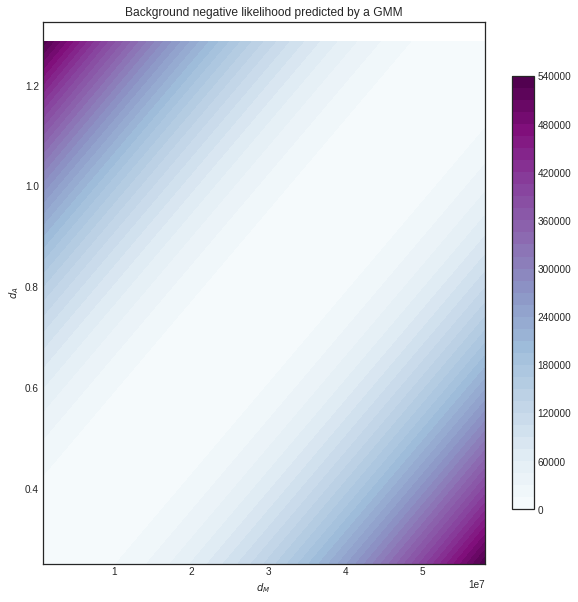

In [78]:
fig = plt.figure(figsize= (9,9))

data = np.vstack((bg_euclidean_eval,bg_cosine_eval))

data = data.T

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data)

# display predicted scores by the model as a contour plot
x = bg_euclidean_eval
y = bg_cosine_eval
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contourf(X, Y, Z,50,cmap='BuPu')

CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.xlim(euclidean_min,euclidean_max)
plt.ylim(cosine_min,cosine_max)
plt.xlabel('$d_M$')
plt.ylabel('$d_A$')
plt.title('Background negative likelihood predicted by a GMM')
fig.tight_layout(pad=3.0)
plt.show()


In [ ]:
data = np.vstack((sg_euclidean_eval,sg_cosine_eval))

data = data.T

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data)

# display predicted scores by the model as a contour plot
x = sg_euclidean_eval
y = sg_cosine_eval
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = (-clf.score_samples(XX))**(-1)

Z = Z.reshape(X.shape)

CC = plt.contourf(X, Y, Z,50,cmap='RdGy')

CA = plt.colorbar(CS, shrink=0.8, extend='both')

In [ ]:
lbd = 1

# concatenating data

data = np.vstack((background,signal))

# creating labels

target = np.ones(len(data))

target[:len(background)] = 0

# calculing EDA

euclidean_EDA,cosine_EDA = Globaldensity_Calculator_v2 (data,lbd,'euclidean')

fig = plt.figure(figsize= (16,9))

ax = fig.subplots(1,2)

fig.suptitle('Global density with z-score using entire data-set', fontsize=16)

# separeting results

bg_euclidean_EDA = euclidean_EDA[target==0]

sg_euclidean_EDA = euclidean_EDA[target==1]

bg_cosine_EDA = cosine_EDA[target==0]

sg_cosine_EDA = cosine_EDA[target==1]


# computing the EDA distribution

bg_euclidean_kernel = stats.gaussian_kde(bg_euclidean_EDA)

sg_euclidean_kernel = stats.gaussian_kde(sg_euclidean_EDA)

bg_cosine_kernel = stats.gaussian_kde(bg_cosine_EDA)

sg_cosine_kernel = stats.gaussian_kde(sg_cosine_EDA)

# defining attributes limits

bg_euclidean_max = max(bg_euclidean_EDA)

bg_euclidean_min = min(bg_euclidean_EDA)

sg_euclidean_max = max(sg_euclidean_EDA)

sg_euclidean_min = min(sg_euclidean_EDA)


bg_cosine_max = max(bg_cosine_EDA)

bg_cosine_min = min(bg_cosine_EDA)

sg_cosine_max = max(sg_cosine_EDA)

sg_cosine_min = min(sg_cosine_EDA)


# creating values interval for time optimization

bg_euclidean_eval = np.linspace(bg_euclidean_min,
                                bg_euclidean_max,
                                num=1000)

sg_euclidean_eval = np.linspace(sg_euclidean_min,
                                sg_euclidean_max,
                                num=1000)


bg_cosine_eval = np.linspace(bg_cosine_min,
                                bg_cosine_max,
                                num=1000)

sg_cosine_eval = np.linspace(sg_cosine_min,
                                sg_cosine_max,
                                num=1000)

# calculating the likelyhood with kde kernel

bg_euclidean_likelyhood = bg_euclidean_kernel(bg_euclidean_eval)

sg_euclidean_likelyhood = sg_euclidean_kernel(sg_euclidean_eval)

bg_cosine_likelyhood = bg_cosine_kernel(bg_cosine_eval)

sg_cosine_likelyhood = sg_cosine_kernel(sg_cosine_eval)

# ploting results

ax[0].plot(bg_euclidean_eval, bg_euclidean_eval, 
        ms=3.5, linestyle='-',
        label= 'Backgorund')

ax[0].plot(sg_euclidean_eval, sg_euclidean_likelyhood, 
        ms=3.5, linestyle='-',
        label= 'Signal')

ax[0].legend()
ax[0].set_title('euclidean')
ax[0].set_xlabel("EDA")
ax[0].set_ylabel("Likelyhood")
ax[0].grid()


ax[1].plot(bg_cosine_eval, bg_cosine_eval, 
        ms=3.5, linestyle='-',
        label= 'Backgorund')

ax[1].plot(sg_cosine_eval, sg_cosine_likelyhood, 
        ms=3.5, linestyle='-',
        label= 'Signal')

ax[1].legend()
ax[1].set_title('cosine')
ax[1].set_xlabel("Global Density")
ax[1].set_ylabel("Likelyhood")
ax[1].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-EDA&z-score-entire-data-set.pdf',format='pdf')

del fig

In [63]:
lbd = 1

# concatenating data

data = np.vstack((background,signal))

# creating labels

target = np.ones(len(data))

target[:len(background)] = 0

# calculing EDA

GD_euclidean,GD_cosine,euclidean_EDA,cosine_EDA = Globaldensity_Calculator_v2 (data,
                                                                                lbd,
                                                                                'euclidean')

fig = plt.figure(figsize= (16,9))

ax = fig.subplots(1,2)

fig.suptitle('Global density with z-score using entire data-set', fontsize=16)

# separeting results

bg_euclidean_EDA = euclidean_EDA[target==0]

sg_euclidean_EDA = euclidean_EDA[target==1]

bg_cosine_EDA = cosine_EDA[target==0]

sg_cosine_EDA = cosine_EDA[target==1]


# computing the EDA distribution

bg_euclidean_kernel = stats.gaussian_kde(bg_euclidean_EDA)

sg_euclidean_kernel = stats.gaussian_kde(sg_euclidean_EDA)

bg_cosine_kernel = stats.gaussian_kde(bg_cosine_EDA)

sg_cosine_kernel = stats.gaussian_kde(sg_cosine_EDA)

# defining attributes limits

bg_euclidean_max = max(bg_euclidean_EDA)

bg_euclidean_min = min(bg_euclidean_EDA)

sg_euclidean_max = max(sg_euclidean_EDA)

sg_euclidean_min = min(sg_euclidean_EDA)


bg_cosine_max = max(bg_cosine_EDA)

bg_cosine_min = min(bg_cosine_EDA)

sg_cosine_max = max(sg_cosine_EDA)

sg_cosine_min = min(sg_cosine_EDA)


# creating values interval for time optimization

bg_euclidean_eval = np.linspace(bg_euclidean_min,
                                bg_euclidean_max,
                                num=100)

sg_euclidean_eval = np.linspace(sg_euclidean_min,
                                sg_euclidean_max,
                                num=100)


bg_cosine_eval = np.linspace(bg_cosine_min,
                                bg_cosine_max,
                                num=100)

sg_cosine_eval = np.linspace(sg_cosine_min,
                                sg_cosine_max,
                                num=100)

# calculating the likelyhood with kde kernel

bg_euclidean_likelyhood = bg_euclidean_kernel(bg_euclidean_eval)

sg_euclidean_likelyhood = sg_euclidean_kernel(sg_euclidean_eval)

bg_cosine_likelyhood = bg_cosine_kernel(bg_cosine_eval)

sg_cosine_likelyhood = sg_cosine_kernel(sg_cosine_eval)

# ploting results

ax[0].plot(bg_euclidean_eval, bg_euclidean_eval, 
        ms=3.5, linestyle='-',
        label= 'Backgorund')

ax[0].plot(sg_euclidean_eval, sg_euclidean_likelyhood, 
        ms=3.5, linestyle='-',
        label= 'Signal')

ax[0].legend()
ax[0].set_title('euclidean')
ax[0].set_xlabel("EDA")
ax[0].set_ylabel("Likelyhood")
ax[0].grid()


ax[1].plot(bg_cosine_eval, bg_cosine_eval, 
        ms=3.5, linestyle='-',
        label= 'Backgorund')

ax[1].plot(sg_cosine_eval, sg_cosine_likelyhood, 
        ms=3.5, linestyle='-',
        label= 'Signal')

ax[1].legend()
ax[1].set_title('cosine')
ax[1].set_xlabel("Global Density")
ax[1].set_ylabel("Likelyhood")
ax[1].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-EDA&z-score-entire-data-set.pdf',format='pdf')

del fig

UnboundLocalError: local variable 'zscore' referenced before assignment

/home/thiago/yes/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


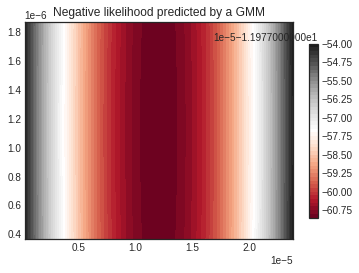

In [55]:
data = np.vstack((bg_euclidean_eval,bg_cosine_eval))

data = data.T

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(data)

# display predicted scores by the model as a contour plot
x = bg_euclidean_eval
y = bg_cosine_eval
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contourf(X, Y, Z,50,cmap='RdGy')

CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Negative likelihood predicted by a GMM')
plt.axis('tight')
plt.show()


In [ ]:

import matplotlib.pyplot as plt

import numpy as np

def f(x, y):
    kernel = stats.gaussian_kde(bg_euclidean_EDA)
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)

bg_euclidean_kernel = stats.gaussian_kde(bg_euclidean_EDA)

Z = f(X, Y)


plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()



# Divisions analisys

In [9]:
# define the paths into the container
data_path  = 'data-divisions/*'

# create a list of config files

file_list  = glob.glob(data_path)

# creating data divisions dictionary

divisions_dict = {}

# getting number of divisions

n_elements = len(file_list)

print('Reading data divisions...')

for i,file_name in enumerate(file_list):

    with open(file_name, 'rb') as f:
        division = pk.load(f)

    divisions_dict[i] = division

    # updating progress bar

    percent = (i+1)/n_elements * 100

    info = '{:.2f}% - {:d} of {:d}'.format(percent,(i+1),n_elements)

    formated_bar = '-'*int(percent) + ' '*int(100-percent)

    if i < (n_elements):
        sys.stdout.write("\r")

    sys.stdout.write('[%s] %s' % (formated_bar,info))
    sys.stdout.flush()


Reading data divisions...
[----------------------------------------------------------------------------------------------------] 100.00% - 33 of 33